<a href="https://colab.research.google.com/github/YoungJae20213137/24_Lab1_1/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch [500/5000], Loss: 0.0011
Final - epoch 499, loss 0.0010948601411655545
Epoch [1000/5000], Loss: 0.0005
Final - epoch 999, loss 0.0004731272056233138
Epoch [1500/5000], Loss: 0.0002
Final - epoch 1499, loss 0.00022694459767080843
Epoch [2000/5000], Loss: 0.0001
Final - epoch 1999, loss 0.00013146185665391386
Epoch [2500/5000], Loss: 0.0004
Final - epoch 2499, loss 0.0003530181129463017
Epoch [3000/5000], Loss: 0.0001
Final - epoch 2999, loss 8.332337165484205e-05
Epoch [3500/5000], Loss: 0.0001
Final - epoch 3499, loss 7.309366628760472e-05
Epoch [4000/5000], Loss: 0.0001
Final - epoch 3999, loss 6.530256359837949e-05
Epoch [4500/5000], Loss: 0.0001
Final - epoch 4499, loss 8.898954547476023e-05
Epoch [5000/5000], Loss: 0.0001
Final - epoch 4999, loss 5.4402462410507724e-05


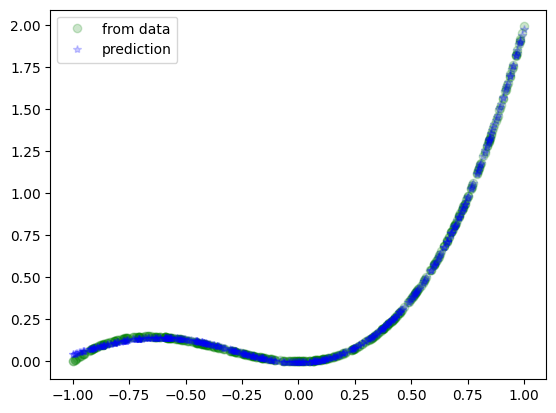

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linear
        self.sigmoid = nn.Sigmoid()
        # Output Linear function
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function # LINEAR
        out = self.fc1(x)
        # Non-linearity # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout) # LINEAR
        out = self.fc2(out)
        return out

# generate the input data
x_vals = 2 * np.random.rand(500) - 1
x_train = np.asarray(x_vals, dtype=np.float32).reshape(-1,1)
y_correct = np.asarray([i**3 + i**2 for i in x_vals], dtype=np.float32).reshape(-1,1)
# instantiate network
input_dim = 1
output_dim = 1
hidden_dim = 20

modelFF = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
criterionFF = nn.MSELoss() # MSL
l_rate = 0.01

optimiser = torch.optim.Adam(modelFF.parameters(), lr = l_rate)

epochs = 5000

# Training
for epoch in range(epochs):
    # Increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    # Clear grads
    optimiser.zero_grad()
    # Forward to get predicted values
    outputs = modelFF.forward(inputs)
    loss = criterionFF(outputs, labels)
    loss.backward()  # Back prop
    optimiser.step()  # Update the parameters

    if (epoch + 1) % 500 == 0:  # Logging
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, epochs, loss.item()))
        print('Final - epoch {}, loss {}'.format(epoch,loss.item()))

# Test Training
predicted = modelFF.forward(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_correct, 'go', label='from data', alpha=0.2)
plt.plot(x_train, predicted, 'b*', label='prediction', alpha=0.2)
plt.legend()
plt.show()